In [51]:
import pandas as pd
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy.lang.en import English
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from gensim.models import Word2Vec, FastText
from gensim.models import KeyedVectors
import numpy as np
import spacy
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
import spacy
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# https://nlp.stanford.edu/projects/glove/

In [52]:
# Load spaCy's language model
nlp = spacy.load("en_core_web_sm")
# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bengreenes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bengreenes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
# Load dataset
df = "/Users/bengreenes/Desktop/Babson/Spring25/OIM7502/Data/nytimes_comments_with_metadata.csv"  # Replace with your actual file path
df_new = pd.read_csv(df)

In [54]:
# Preprocessing function without stemming (using lemmatization)
def preprocess_text(text):
    # Ensure the text is a string (handle potential NaNs or non-string values)
    if not isinstance(text, str):
        text = str(text)

    # Tokenization using NLTK
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]  # Keep only alphanumeric tokens
    
    # Lemmatization using spaCy
    doc = nlp(" ".join(tokens))  # Create a spaCy document
    tokens_lemmatized = [token.lemma_ for token in doc]  # Lemmatize each token
    
    # Create bigrams and trigrams (Optional step)
    n_grams = list(ngrams(tokens_lemmatized, 2)) + list(ngrams(tokens_lemmatized, 3))  # bigrams and trigrams
    
    # Return the processed tokens without POS tagging or stemming
    return {
        'tokens': tokens,
        'tokens_lemmatized': tokens_lemmatized,
        'n_grams': n_grams
    }

# Load dataset
file_path = '/Users/bengreenes/Desktop/Babson/Spring25/OIM7502/Data/nytimes_comments_with_metadata.csv'
df = pd.read_csv(file_path)

# Check for missing or non-string values and clean them
df['commentBody'] = df['commentBody'].fillna('')  # Replace NaN with empty string

# Apply the preprocessing function to the commentBody column
df['processed_text'] = df['commentBody'].apply(preprocess_text)

# Now access the processed tokens correctly
# Let's inspect a few rows of the processed text (use .apply to view tokens or lemmatized tokens)
print(df[['processed_text']].head())

# Example: if you want to access the 'tokens_lemmatized' from the 'processed_text' column
df['lemmatized_tokens'] = df['processed_text'].apply(lambda x: x['tokens_lemmatized'])
print(df[['lemmatized_tokens']].head())

# Save the processed data to a new CSV file in the same directory
output_file_path = file_path.replace(".csv", "_processed.csv")
df.to_csv(output_file_path, index=False)


                                      processed_text
0  {'tokens': ['know', 'tariffs', 'going', 'great...
1  {'tokens': ['free', 'trade', 'disproportionate...
2  {'tokens': ['mercantilism', 'never', 'really',...
3  {'tokens': ['bank', 'ideas', 'way', 'handle', ...
4  {'tokens': ['robert', 'think', 'misinterpreted...
                                   lemmatized_tokens
0  [know, tariff, go, great, trump, think, global...
1  [free, trade, disproportionately, benefit, big...
2  [mercantilism, never, really, go, away, trade,...
3  [bank, idea, way, handle, get, well, outproduc...
4  [robert, think, misinterpreted, point, justify...


In [55]:

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define the file path for the dataset
processed = "/Users/bengreenes/Desktop/Babson/Spring25/OIM7502/Data/nytimes_comments_with_metadata_processed.csv"

# Load dataset
df = pd.read_csv(processed)

# Preprocessing function to tokenize, remove stopwords, and lemmatize
def preprocess_text(text):
    # Tokenize using NLTK
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]  # Keep only alphanumeric tokens
    
    # Lemmatize using spaCy
    doc = nlp(" ".join(tokens))  # Create a spaCy document
    tokens_lemmatized = [token.lemma_ for token in doc]  # Lemmatize each token
    
    return tokens_lemmatized

# Apply preprocessing function to the 'commentBody' column
df['processed_text'] = df['commentBody'].apply(preprocess_text)

# Flatten the list of tokens into a single list
all_tokens = [token for sublist in df['processed_text'] for token in sublist]

# Count the frequency of each word
word_counts = Counter(all_tokens)

# Get the top 2000 most common words
top_2000_words = word_counts.most_common(2000)

# Print top 2000 words
print(top_2000_words)


[('trump', 5991), ('we', 3580), ('tariff', 3354), ('canada', 3043), ('country', 2104), ('make', 2088), ('go', 2063), ('would', 1934), ('people', 1854), ('get', 1845), ('good', 1696), ('price', 1605), ('american', 1597), ('like', 1551), ('one', 1478), ('think', 1351), ('well', 1323), ('trade', 1317), ('pay', 1250), ('need', 1231), ('work', 1228), ('time', 1177), ('americans', 1163), ('world', 1159), ('say', 1152), ('see', 1132), ('year', 1130), ('america', 1107), ('china', 1081), ('mexico', 1061), ('take', 1048), ('want', 1043), ('know', 1038), ('many', 1032), ('even', 1018), ('much', 1004), ('come', 953), ('vote', 945), ('canadian', 924), ('tax', 917), ('economy', 912), ('thing', 893), ('way', 889), ('buy', 836), ('us', 824), ('could', 822), ('high', 820), ('cost', 791), ('economic', 779), ('state', 778), ('back', 775), ('government', 769), ('also', 761), ('use', 738), ('long', 730), ('product', 699), ('look', 699), ('president', 699), ('worker', 692), ('market', 690), ('never', 679), 

In [56]:
from gensim.models import Word2Vec

# Define the list of top 2000 words with their counts (make sure it's properly structured as a list of tuples)
top_2000_words = [
    ('trump', 5991), ('we', 3580), ('tariff', 3354), ('canada', 3043), ('country', 2104),
    ('make', 2088), ('go', 2063), ('would', 1934), ('people', 1854), ('get', 1845),
    ('good', 1696), ('price', 1605), ('american', 1597), ('like', 1551), ('one', 1478),
    # Add other words and counts here...
]

# Extract only the words (without their frequencies) for Word2Vec
words = [word for word, count in top_2000_words]  # This should work as each element is a tuple

# Create a list of "sentences" where each word is treated as its own "sentence"
sentences = [[word] for word in words]

# Now, you can train the Word2Vec model on these sentences
from gensim.models import Word2Vec

model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model_w2v.save("/Users/bengreenes/Desktop/Babson/Spring25/OIM7502/Data/word2vec_model_with_filtered_words.model")

# Example: Get the vector for a word
word_vector = model_w2v.wv['trump']  # Replace 'trump' with any word
print("Word vector for 'trump':", word_vector)

# Example: Find similar words
similar_words = model_w2v.wv.most_similar('tariff', topn=5)
print("Similar words to 'tariff':", similar_words)


Word vector for 'trump': [ 7.6966463e-03  9.1206422e-03  1.1355019e-03 -8.3250795e-03
  8.4250160e-03 -3.6962307e-03  5.7421732e-03  4.3915794e-03
  9.6899448e-03 -9.2934975e-03  9.2084054e-03 -9.2815282e-03
 -6.9077122e-03 -9.1021946e-03 -5.5471100e-03  7.3688962e-03
  9.1644777e-03 -3.3253515e-03  3.7230505e-03 -3.6252034e-03
  7.8814710e-03  5.8668759e-03  2.0861626e-07 -3.6286747e-03
 -7.2243060e-03  4.7686161e-03  1.4529788e-03 -2.6131857e-03
  7.8378068e-03 -4.0496145e-03 -9.1489861e-03 -2.2554707e-03
  1.2514711e-04 -6.6392552e-03 -5.4866159e-03 -8.4997769e-03
  9.2298733e-03  7.4240281e-03 -2.9524326e-04  7.3676636e-03
  7.9507884e-03 -7.8357337e-04  6.6120909e-03  3.7675237e-03
  5.0768424e-03  7.2529912e-03 -4.7393893e-03 -2.1855331e-03
  8.7312341e-04  4.2362059e-03  3.3043313e-03  5.0958274e-03
  4.5864857e-03 -8.4385090e-03 -3.1838394e-03 -7.2367596e-03
  9.6814223e-03  5.0065992e-03  1.7084122e-04  4.1129780e-03
 -7.6561309e-03 -6.2946510e-03  3.0763936e-03  6.5346383e-03

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


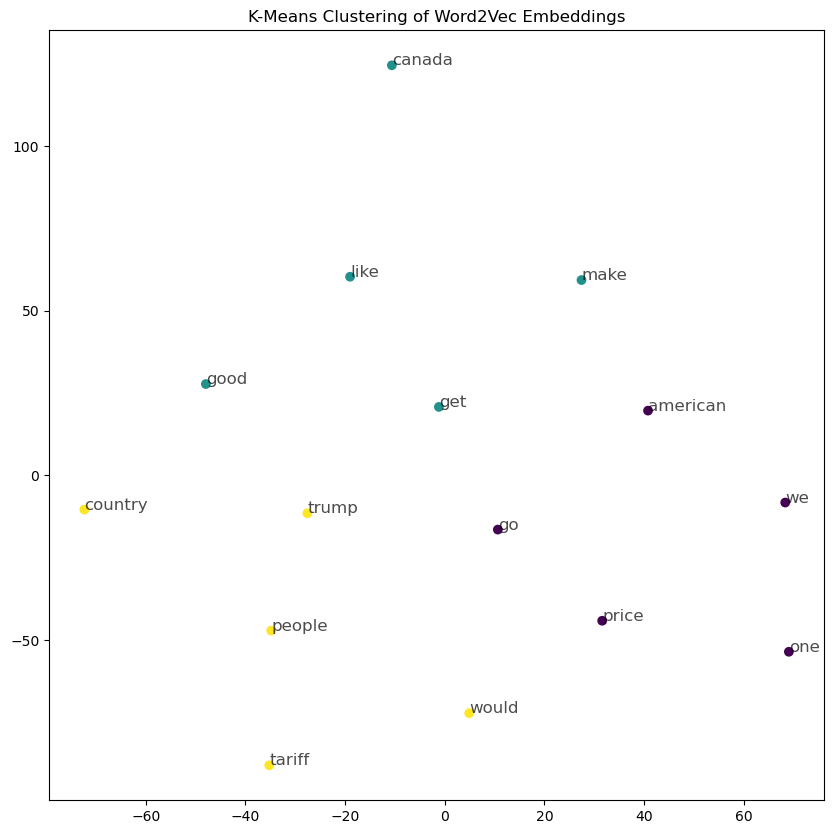

In [57]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

def kmeans_clustering_2d_word2vec(model, words=None, n_clusters=3, title="K-Means Clustering of Word2Vec Embeddings"):
    """
    Visualize Word2Vec embeddings with K-Means clustering in 2D.
    """
    if words is None:
        # Use the top 2000 words from the model's vocabulary if none are specified
        words = list(model.wv.index_to_key)[:2000]  # Get the top 2000 words from the model
    
    # Get the word vectors for the selected words
    word_vectors = [model.wv[word] for word in words]
    
    # Reduce dimensionality using PCA (to speed up t-SNE)
    pca_components = min(len(word_vectors), 50)  # Set PCA components to the minimum of number of words or 50
    pca = PCA(n_components=pca_components)  # Dynamically set n_components
    pca_result = pca.fit_transform(word_vectors)
    
    # Use t-SNE to reduce to 2D for visualization
    tsne = TSNE(n_components=2, random_state=0, n_iter=300, perplexity=min(30, len(word_vectors)-1))
    tsne_result = tsne.fit_transform(pca_result)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(tsne_result)
    cluster_labels = kmeans.labels_

    # Plot the results with clustering
    plt.figure(figsize=(10, 10))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')

    # Annotate points with corresponding words
    for i, word in enumerate(words):
        plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=12, alpha=0.7)

    plt.title(title)
    plt.show()

# Example: Visualizing Word2Vec embeddings for the top 2000 words with clustering
kmeans_clustering_2d_word2vec(model_w2v, n_clusters=3)

In [58]:
from nltk.corpus import stopwords

# List of words and their counts
top_words = [
    ('trump', 5991), ('we', 3580), ('tariff', 3354), ('canada', 3043), ('country', 2104),
    ('make', 2088), ('go', 2063), ('would', 1934), ('people', 1854), ('get', 1845),
    ('good', 1696), ('price', 1605), ('american', 1597), ('like', 1551), ('one', 1478),
    ('think', 1351), ('well', 1323), ('trade', 1317), ('pay', 1250), ('need', 1231),
    ('work', 1228), ('time', 1177), ('americans', 1163), ('world', 1159), ('say', 1152),
    ('see', 1132), ('year', 1130), ('america', 1107), ('china', 1081), ('mexico', 1061),
    ('take', 1048), ('want', 1043), ('know', 1038), ('many', 1032), ('even', 1018),
    ('much', 1004), ('come', 953), ('vote', 945), ('canadian', 924), ('tax', 917),
    ('economy', 912), ('thing', 893), ('way', 889), ('buy', 836), ('us', 824), ('could', 822),
    ('high', 820), ('cost', 791), ('economic', 779), ('state', 778), ('back', 775), ('government', 769),
    ('also', 761), ('use', 738), ('long', 730), ('product', 699), ('look', 699), ('president', 699),
    ('worker', 692), ('market', 690), ('never', 679), ('give', 678), ('right', 672), ('business', 666)
    # Add more words...
]

# Download the list of English stopwords from NLTK (if you haven't already)
import nltk
nltk.download('stopwords')

# List of stop words from NLTK
stop_words = set(stopwords.words('english'))

# Filter out stop words from the list of words
filtered_words = [(word, count) for word, count in top_words if word.lower() not in stop_words]

# Display the filtered words
print("Filtered relevant words (after removing general words):", filtered_words)


Filtered relevant words (after removing general words): [('trump', 5991), ('tariff', 3354), ('canada', 3043), ('country', 2104), ('make', 2088), ('go', 2063), ('would', 1934), ('people', 1854), ('get', 1845), ('good', 1696), ('price', 1605), ('american', 1597), ('like', 1551), ('one', 1478), ('think', 1351), ('well', 1323), ('trade', 1317), ('pay', 1250), ('need', 1231), ('work', 1228), ('time', 1177), ('americans', 1163), ('world', 1159), ('say', 1152), ('see', 1132), ('year', 1130), ('america', 1107), ('china', 1081), ('mexico', 1061), ('take', 1048), ('want', 1043), ('know', 1038), ('many', 1032), ('even', 1018), ('much', 1004), ('come', 953), ('vote', 945), ('canadian', 924), ('tax', 917), ('economy', 912), ('thing', 893), ('way', 889), ('buy', 836), ('us', 824), ('could', 822), ('high', 820), ('cost', 791), ('economic', 779), ('state', 778), ('back', 775), ('government', 769), ('also', 761), ('use', 738), ('long', 730), ('product', 699), ('look', 699), ('president', 699), ('worker

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bengreenes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [60]:
# Visualize Word2Vec embeddings
def visualize_embeddings(model, title="Word Embeddings", words=None):
    """
    Visualize word embeddings using PCA and t-SNE.
    """
    # Get the vectors for the words in the model
    if words is None:
        words = list(model.wv.index_to_key)
    
    word_vectors = [model.wv[word] for word in words]
    
    # Reduce dimensionality using PCA (to speed up t-SNE)
    pca = PCA(n_components=50)
    pca_result = pca.fit_transform(word_vectors)

    # Use t-SNE to reduce to 2D
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(pca_result)

    # Plot the results
    plt.figure(figsize=(10, 10))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1])

    # Annotate points with corresponding words
    for i, word in enumerate(words):
        plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=12)

    plt.title(title)
    plt.show()


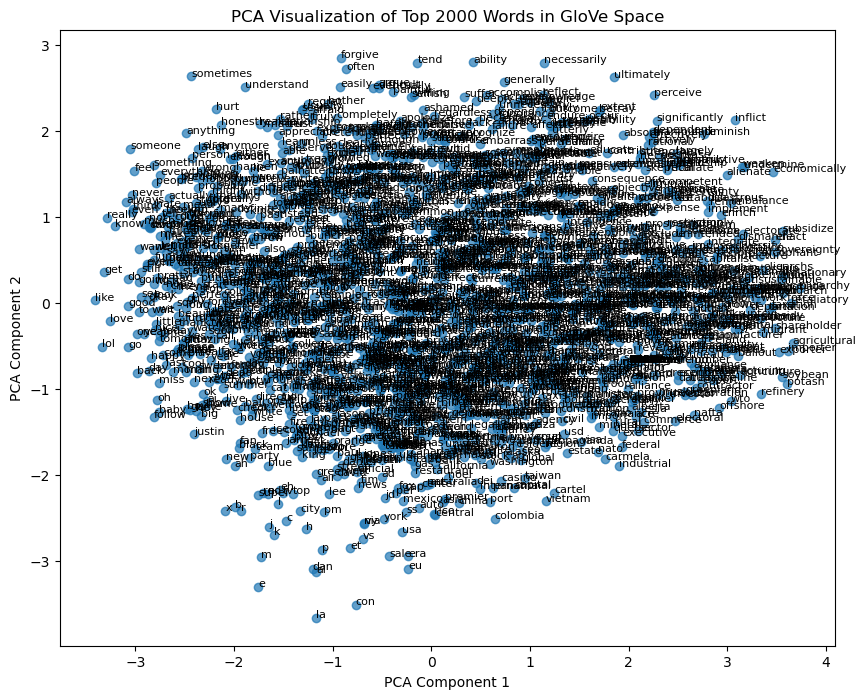

In [61]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors

# Load GloVe embeddings (adjust the path if necessary)
glove_model_path = "/Users/bengreenes/Desktop/Babson/Spring25/OIM7502/glove.twitter.27B.200d.txt"  # Replace with the correct path
glove_model = KeyedVectors.load_word2vec_format(glove_model_path, binary=False, no_header=True)

# Get the top 2000 words (you already have this from your previous code)
top_2000_words = [word[0] for word in word_counts.most_common(2000)]

# Create a list to store vectors
word_vectors = []

# Iterate over each word and get its vector from the GloVe model
for word in top_2000_words:
    if word in glove_model:
        word_vectors.append(glove_model[word])
    else:
        # If the word is not in the model, append a vector of zeros
        word_vectors.append(np.zeros(glove_model.vector_size))

# Convert the word vectors to a numpy array for PCA
word_vectors = np.array(word_vectors)

# Apply PCA to reduce the dimensions from 100D to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Visualize the reduced vectors
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)

# Annotate points with words (optional for better readability)
for i, word in enumerate(top_2000_words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=8)

plt.title("PCA Visualization of Top 2000 Words in GloVe Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


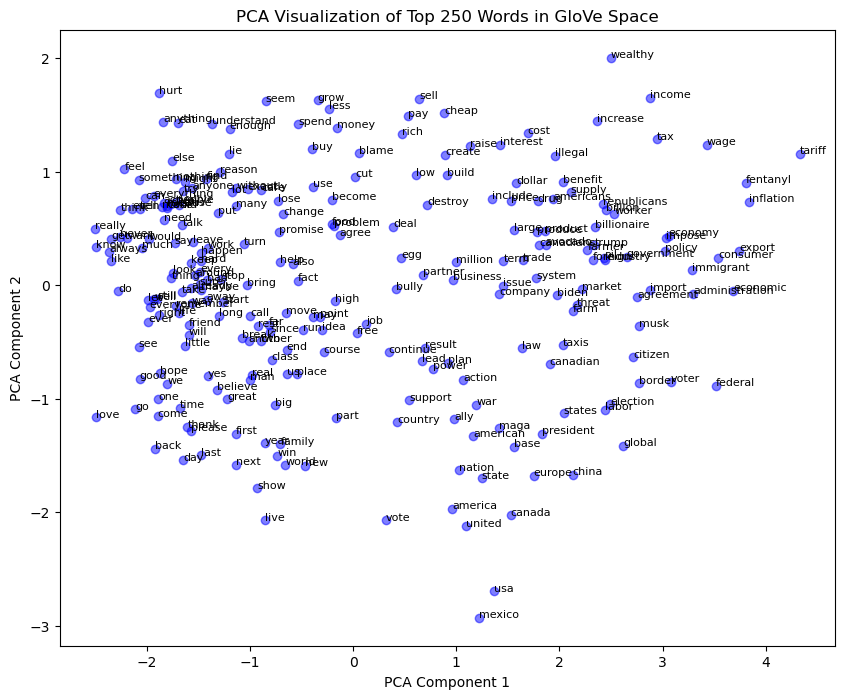

In [62]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import KeyedVectors

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load GloVe embeddings (adjust the path if necessary)
glove_model_path = "/Users/bengreenes/Desktop/Babson/Spring25/OIM7502/glove.twitter.27B.200d.txt"  # Replace with the correct path
glove_model = KeyedVectors.load_word2vec_format(glove_model_path, binary=False, no_header=True)


# Preprocessing function to tokenize, remove stopwords, and lemmatize
def preprocess_text(text):
    # Tokenize using NLTK
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]  # Keep only alphanumeric tokens
    
    # Lemmatize using spaCy
    doc = nlp(" ".join(tokens))  # Create a spaCy document
    tokens_lemmatized = [token.lemma_ for token in doc]  # Lemmatize each token
    
    return tokens_lemmatized

# Apply preprocessing function to the 'commentBody' column
df['processed_text'] = df['commentBody'].apply(preprocess_text)

# Flatten the list of tokens into a single list
all_tokens = [token for sublist in df['processed_text'] for token in sublist]

# Count the frequency of each word
word_counts = Counter(all_tokens)

# Get the top 250 most common words
top_250_words = [word for word, _ in word_counts.most_common(250)]

# Load the GloVe model (example with 100d, you can adjust for 50d, 200d etc.)
glove_model_path = "/Users/bengreenes/Desktop/Babson/Spring25/OIM7502/glove.twitter.27B.100d.txt"  # Replace with correct path
glove_model = KeyedVectors.load_word2vec_format(glove_model_path, binary=False, no_header=True)

# Filter the embeddings for the top 250 words
word_vectors = []
words_in_glove = []

for word in top_250_words:
    if word in glove_model.key_to_index:
        word_vectors.append(glove_model[word])
        words_in_glove.append(word)

# Apply PCA to reduce the vector dimensions from 100D to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Visualize the reduced vectors
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='blue', alpha=0.5)

# Annotate the words in the 2D plot
for i, word in enumerate(words_in_glove):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=8)

plt.title("PCA Visualization of Top 250 Words in GloVe Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


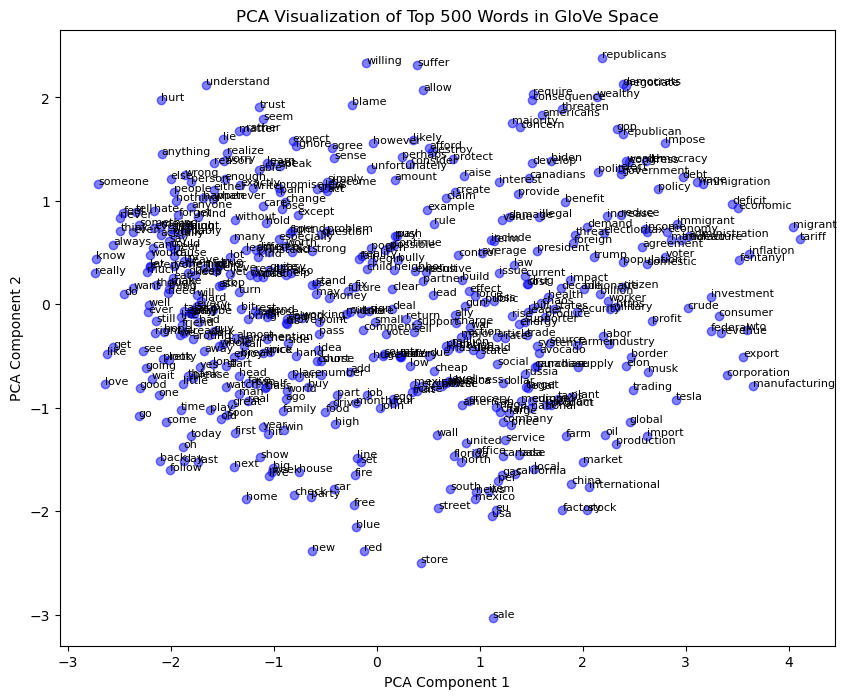

In [66]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import KeyedVectors

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load dataset
processed = "/Users/bengreenes/Desktop/Babson/Spring25/OIM7502/data/nytimes_comments_with_metadata_processed.csv"
df = pd.read_csv(processed)

# Preprocessing function to tokenize, remove stopwords, and lemmatize
def preprocess_text(text):
    # Tokenize using NLTK
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]  # Keep only alphanumeric tokens
    
    # Lemmatize using spaCy
    doc = nlp(" ".join(tokens))  # Create a spaCy document
    tokens_lemmatized = [token.lemma_ for token in doc]  # Lemmatize each token
    
    return tokens_lemmatized

# Apply preprocessing function to the 'commentBody' column
df['processed_text'] = df['commentBody'].apply(preprocess_text)

# Flatten the list of tokens into a single list
all_tokens = [token for sublist in df['processed_text'] for token in sublist]

# Count the frequency of each word
word_counts = Counter(all_tokens)

# Get the top 500 most common words
top_500_words = [word for word, _ in word_counts.most_common(500)]

# Load the GloVe model (example with 100d, you can adjust for 50d, 200d etc.)
glove_model_path = "/Users/bengreenes/Desktop/Babson/Spring25/OIM7502/glove.twitter.27B.100d.txt"  # Replace with correct path
glove_model = KeyedVectors.load_word2vec_format(glove_model_path, binary=False, no_header=True)

# Filter the embeddings for the top 500 words
word_vectors = []
words_in_glove = []

for word in top_500_words:
    if word in glove_model.key_to_index:
        word_vectors.append(glove_model[word])
        words_in_glove.append(word)

# Apply PCA to reduce the vector dimensions from 100D to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Visualize the reduced vectors
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='blue', alpha=0.5)

# Annotate the words in the 2D plot
for i, word in enumerate(words_in_glove):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=8)

plt.title("PCA Visualization of Top 500 Words in GloVe Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


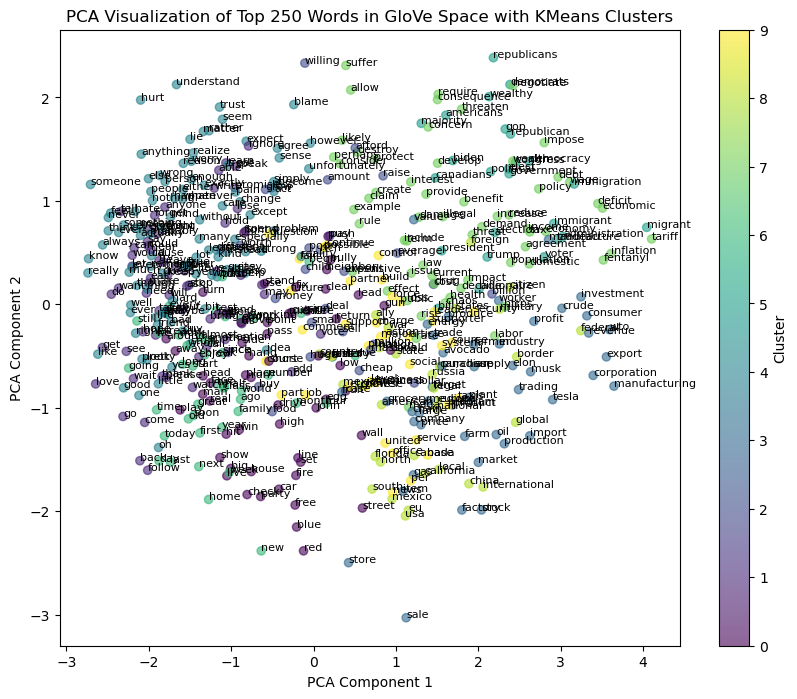

In [69]:
from sklearn.cluster import KMeans

# Apply KMeans clustering on the word vectors
num_clusters = 10  # You can adjust this number based on the number of clusters you want
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(word_vectors)

# Apply PCA to reduce the vector dimensions from 100D to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Plot with different colors for each cluster
plt.figure(figsize=(10, 8))

# Create a color map based on the clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)

# Annotate the words in the 2D plot
for i, word in enumerate(words_in_glove):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=8)

plt.title("PCA Visualization of Top 250 Words in GloVe Space with KMeans Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()


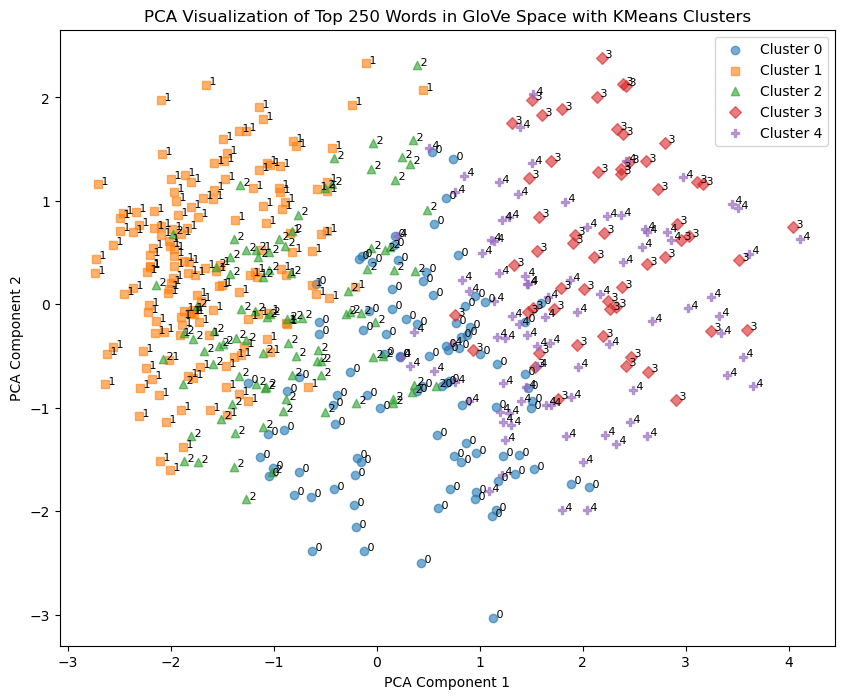

In [82]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply KMeans clustering on the word vectors
num_clusters = 5  # You can adjust this number based on the number of clusters you want
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(word_vectors)

# Apply PCA to reduce the vector dimensions from 100D to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Define a list of different markers for each cluster
markers = ['o', 's', '^', 'D', 'P', 'H', 'x', '+', '*', '.']

# Plot with different markers for each cluster
plt.figure(figsize=(10, 8))

# Plot each cluster with a different marker
for cluster in range(num_clusters):
    cluster_indices = [i for i, label in enumerate(clusters) if label == cluster]
    plt.scatter(pca_result[cluster_indices, 0], pca_result[cluster_indices, 1], 
                marker=markers[cluster], label=f"Cluster {cluster}", alpha=0.6)

# Annotate the clusters by their respective cluster number
for i, cluster_label in enumerate(clusters):
    plt.annotate(f' {cluster_label}', (pca_result[i, 0], pca_result[i, 1]), fontsize=8)

plt.title("PCA Visualization of Top 250 Words in GloVe Space with KMeans Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(loc="best")
plt.show()


In [73]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming word_vectors and words_in_glove are already loaded

# Apply KMeans clustering on the word vectors
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(word_vectors)

# Create a DataFrame to visualize the clusters
cluster_df = pd.DataFrame({
    'Word': words_in_glove,
    'Cluster': clusters
})

# List words for each cluster
clustered_words = {}

for cluster_num in range(num_clusters):
    words_in_cluster = cluster_df[cluster_df['Cluster'] == cluster_num]['Word'].tolist()
    clustered_words[cluster_num] = words_in_cluster

# Display the words in each cluster
for cluster_num, words in clustered_words.items():
    print(f"Cluster {cluster_num}:")
    print(", ".join(words))
    print("\n")


Cluster 0:
canada, country, american, world, america, china, mexico, vote, high, state, new, usa, job, war, big, live, power, point, deal, maga, support, part, plan, united, nation, run, partner, show, result, bully, free, europe, lead, win, destroy, action, base, continue, national, stand, south, party, control, add, hit, pass, due, supporter, car, history, force, house, protect, case, office, social, california, line, sale, etc, comment, news, rule, eu, drive, red, john, claim, international, north, fail, public, reality, blue, check, set, wall, street, gun, russia, local, clear, face, sign, fire, florida, store, chaos, return, per, major, massive, level, fair, legal, begin, charge, push


Cluster 1:
we, make, go, would, people, get, good, like, one, think, well, need, work, time, say, see, take, want, know, even, much, come, thing, way, buy, us, could, back, use, look, never, give, right, care, money, really, help, bad, let, may, nothing, believe, friend, understand, stop, keep, act

In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the vector dimensions from 100D or 200D to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform([word_vector_glove_100d])

# Visualize the reduced vectors
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.annotate('tariff', (pca_result[0, 0], pca_result[0, 1]))
plt.title("2D Visualization of 'tariff' Word Vector")
plt.show()

NameError: name 'word_vector_glove_100d' is not defined

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function for interactive 2D visualization
def interactive_2d_word2vec(model, words, title="Word2Vec Embeddings"):
    """
    Visualizes selected word embeddings in 2D space using PCA for dimensionality reduction,
    followed by t-SNE for fine-tuning the visualization.

    Args:
    - model: Word2Vec model
    - words: List of words to visualize
    - title: The title of the plot
    """
    # Ensure words are in the model's vocabulary
    words = [word for word in words if word in model.wv.index_to_key]
    
    # Get the vectors for the words
    word_vectors = [model.wv[word] for word in words]
    
    # Apply PCA to reduce dimensions to something manageable
    pca = PCA(n_components=min(50, len(word_vectors)))  # Use min to avoid overfitting with few words
    pca_result = pca.fit_transform(word_vectors)
    
    # Use t-SNE to reduce to 2D
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(pca_result)
    
    # Create scatter plot for 2D visualization
    plt.figure(figsize=(10, 10))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1])

    # Annotate the points with the words
    for i, word in enumerate(words):
        plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=12)

    # Set plot title and display
    plt.title(title)
    plt.show()

# Example: Visualizing Word2Vec embeddings for selected words
words_to_visualize = ['tariff', 'trade', 'economy', 'china', 'global', 'policy', 'trump', 'market']
interactive_2d_word2vec(model_w2v, words=words_to_visualize, title="Word2Vec Embeddings of Selected Words")


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function for interactive 2D visualization
def interactive_2d_word2vec(model, words, title="Word2Vec Embeddings"):
    """
    Visualizes selected word embeddings in 2D space using PCA for dimensionality reduction,
    followed by t-SNE for fine-tuning the visualization.

    Args:
    - model: Word2Vec model
    - words: List of words to visualize
    - title: The title of the plot
    """
    # Ensure words are in the model's vocabulary
    words = [word for word in words if word in model.wv.index_to_key]
    
    # Get the vectors for the words
    word_vectors = [model.wv[word] for word in words]
    
    # Apply PCA to reduce dimensions to something manageable
    pca = PCA(n_components=min(50, len(word_vectors)))  # Use min to avoid overfitting with few words
    pca_result = pca.fit_transform(word_vectors)
    
    # Use t-SNE to reduce to 2D with a smaller perplexity value
    tsne = TSNE(n_components=2, perplexity=min(10, len(words) - 1), random_state=0)  # Adjust perplexity
    tsne_result = tsne.fit_transform(pca_result)
    
    # Create scatter plot for 2D visualization
    plt.figure(figsize=(10, 10))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1])

    # Annotate the points with the words
    for i, word in enumerate(words):
        plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=12)

    # Set plot title and display
    plt.title(title)
    plt.show()

# Example: Visualizing Word2Vec embeddings for selected words
words_to_visualize = ['tariff', 'trade', 'economy', 'china', 'global', 'policy', 'trump', 'market']
interactive_2d_word2vec(model_w2v, words=words_to_visualize, title="Word2Vec Embeddings of Selected Words")
